<a href="https://colab.research.google.com/github/SulaksanaHS/MachineLearning-2/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Path ke file di Google Drive
file_path = "/content/drive/My Drive/content/diabetes.csv"

# Baca file CSV
df = pd.read_csv(file_path)

In [ ]:
df.head(50)
df.tail(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
718,1,108,60,46,178,35.5,0.415,24,0
719,5,97,76,27,0,35.6,0.378,52,1
720,4,83,86,19,0,29.3,0.317,34,0
721,1,114,66,36,200,38.1,0.289,21,0
722,1,149,68,29,127,29.3,0.349,42,1
723,5,117,86,30,105,39.1,0.251,42,0
724,1,111,94,0,0,32.8,0.265,45,0
725,4,112,78,40,0,39.4,0.236,38,0
726,1,116,78,29,180,36.1,0.496,25,0
727,0,141,84,26,0,32.4,0.433,22,0


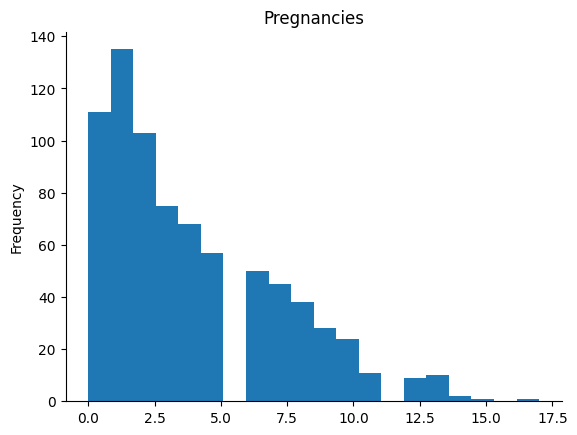

In [ ]:
from matplotlib import pyplot as plt
df['Pregnancies'].plot(kind='hist', bins=20, title='Pregnancies')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(df.shape)

(768, 9)


In [ ]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [ ]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


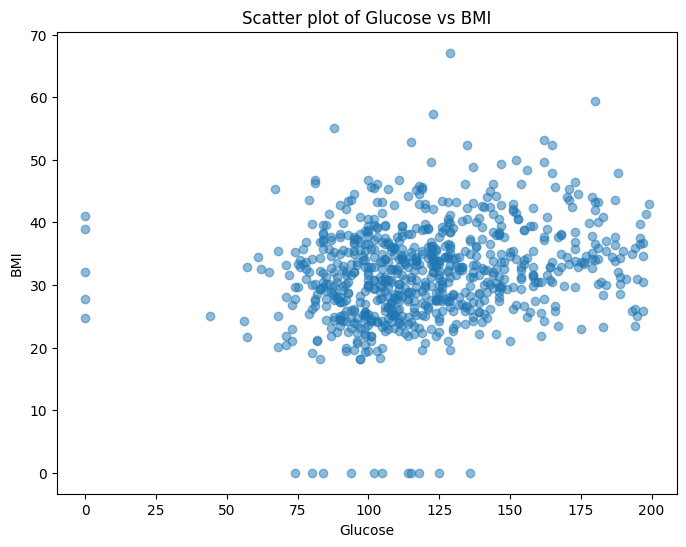

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Glucose'], df['BMI'], alpha=0.5)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Scatter plot of Glucose vs BMI')
plt.show()

In [ ]:
features_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for feature in features_with_zeros:
    df[feature] = df[feature].replace(0, df[feature].mean())

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('Outcome', axis=1) # Fitur
y = df['Outcome'] # Target

In [ ]:
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7291666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       123
           1       0.62      0.65      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model = LogisticRegression(solver='liblinear', random_state=42) # solver='liblinear' disarankan untuk dataset kecil
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
y_pred_logistic = logistic_model.predict(X_test)

In [ ]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

In [ ]:
print(f'Accuracy (Logistic Regression): {accuracy_logistic}')
print('Classification Report (Logistic Regression):')
print(report_logistic)

Accuracy (Logistic Regression): 0.7447916666666666
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       123
           1       0.68      0.55      0.61        69

    accuracy                           0.74       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.74      0.74      0.74       192



In [ ]:
coefficients = logistic_model.coef_[0]
features = X.columns
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
print("Coefficients of Logistic Regression Model:")
print(coeff_df.sort_values(by='Coefficient', ascending=False))

Coefficients of Logistic Regression Model:
                    Feature  Coefficient
6  DiabetesPedigreeFunction     0.260188
5                       BMI     0.070161
0               Pregnancies     0.067269
1                   Glucose     0.031307
7                       Age     0.026398
3             SkinThickness    -0.000841
4                   Insulin    -0.001170
2             BloodPressure    -0.032511


In [ ]:
intercept = logistic_model.intercept_[0]
print(f"\nIntercept of Logistic Regression Model: {intercept}")


Intercept of Logistic Regression Model: -5.549658734172729


In [ ]:
y_pred_proba = logistic_model.predict_proba(X_test)

In [ ]:
print("\nPredicted Probabilities (first 5 samples):")
print(y_pred_proba[:5])


Predicted Probabilities (first 5 samples):
[[0.64133417 0.35866583]
 [0.79733825 0.20266175]
 [0.81288913 0.18711087]
 [0.82156386 0.17843614]
 [0.59515756 0.40484244]]


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1]) # Gunakan probabilitas kelas positif
print(f"\nAUC-ROC Score: {roc_auc}")


AUC-ROC Score: 0.7909744314834453


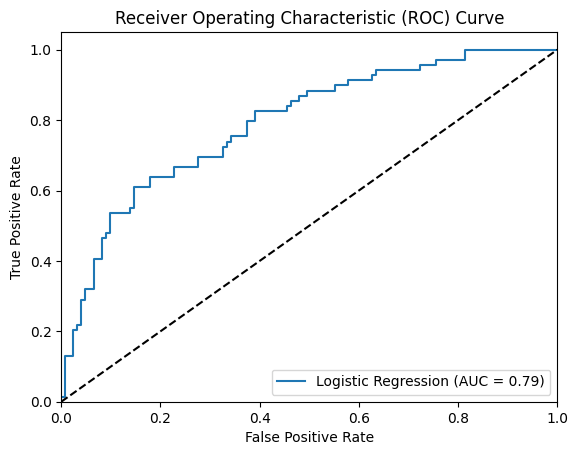

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()